In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import os 
import datetime
from scipy import stats
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap

In [2]:
vis = pd.read_csv("vis_12_2021_01_2022.csv", index_col=[0])
vis.index = pd.to_datetime(vis.index, format="%d/%m/%Y")
vis

,ABK,ABE,ABU,ADO,AKU,ASA,AWK,BAU,BEN,BID,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YOL,ZAR,YEN
date,,,,,,,,,,,,,,,,,,,,,
2021-12-01,10.0,13.0,10.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,10.0,10.0,16.0,6.0,20.0,5.3,10.0,8.0,10.0
2021-12-02,10.0,10.0,10.0,10.0,8.0,10.0,10.0,1.5,10.0,10.0,...,NaN,20.0,7.0,NaN,10.0,20.0,20.0,1.0,3.0,NaN
2021-12-03,10.0,13.0,3.0,13.0,10.0,10.0,10.0,1.0,10.0,1.0,...,NaN,20.0,3.0,15.0,7.0,20.0,1.5,1.6,1.0,10.0
2021-12-04,8.0,12.0,5.0,4.5,8.0,8.0,8.0,6.0,6.0,1.0,...,NaN,15.0,4.0,8.0,8.0,10.0,1.5,2.0,2.0,10.0
2021-12-05,7.0,8.0,4.0,3.0,5.0,8.0,8.0,8.0,7.0,1.0,...,NaN,2.5,10.0,7.0,3.0,NaN,3.5,5.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-27,5.0,5.0,5.0,1.0,2.0,3.0,1.5,0.8,1.8,4.0,...,NaN,7.0,1.0,8.0,3.0,10.0,3.5,0.4,1.5,1.5
2022-01-28,2.5,5.0,1.0,0.5,1.8,2.5,1.6,0.8,2.2,0.8,...,NaN,7.0,0.8,NaN,3.0,10.0,1.0,0.6,1.0,1.5
2022-01-29,1.5,5.0,1.2,1.0,1.0,2.0,1.0,2.0,1.5,0.8,...,NaN,NaN,1.8,1.8,1.0,10.0,1.2,5.0,1.0,1.5


In [3]:
stn_coord = pd.read_csv("coords.csv")
stn = stn_coord["stn"]
stn_lat = stn_coord["lat"]
stn_lon = stn_coord["lon"]

In [4]:
# cap visibility maximum to 10km
vis.columns
for i in vis.columns:
    vis[i] = np.where(vis[i] > 10, 10, vis[i])
vis
# df["Income"] = np.where(df["Income"] <2960.0, 2960.0,df['Income'])

,ABK,ABE,ABU,ADO,AKU,ASA,AWK,BAU,BEN,BID,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YOL,ZAR,YEN
date,,,,,,,,,,,,,,,,,,,,,
2021-12-01,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,10.0,10.0,10.0,6.0,10.0,5.3,10.0,8.0,10.0
2021-12-02,10.0,10.0,10.0,10.0,8.0,10.0,10.0,1.5,10.0,10.0,...,NaN,10.0,7.0,NaN,10.0,10.0,10.0,1.0,3.0,NaN
2021-12-03,10.0,10.0,3.0,10.0,10.0,10.0,10.0,1.0,10.0,1.0,...,NaN,10.0,3.0,10.0,7.0,10.0,1.5,1.6,1.0,10.0
2021-12-04,8.0,10.0,5.0,4.5,8.0,8.0,8.0,6.0,6.0,1.0,...,NaN,10.0,4.0,8.0,8.0,10.0,1.5,2.0,2.0,10.0
2021-12-05,7.0,8.0,4.0,3.0,5.0,8.0,8.0,8.0,7.0,1.0,...,NaN,2.5,10.0,7.0,3.0,NaN,3.5,5.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-27,5.0,5.0,5.0,1.0,2.0,3.0,1.5,0.8,1.8,4.0,...,NaN,7.0,1.0,8.0,3.0,10.0,3.5,0.4,1.5,1.5
2022-01-28,2.5,5.0,1.0,0.5,1.8,2.5,1.6,0.8,2.2,0.8,...,NaN,7.0,0.8,NaN,3.0,10.0,1.0,0.6,1.0,1.5
2022-01-29,1.5,5.0,1.2,1.0,1.0,2.0,1.0,2.0,1.5,0.8,...,NaN,NaN,1.8,1.8,1.0,10.0,1.2,5.0,1.0,1.5


In [5]:
vis['KAN'].describe()

count    60.000000
mean      5.536667
std       3.545537
min       0.300000
25%       2.000000
50%       5.500000
75%      10.000000
max      10.000000
Name: KAN, dtype: float64

In [6]:
bsc = xr.open_dataset("nc_files/SILAM/2021120100_SILAM.nc")
bsc


<xarray.Dataset>
Dimensions:     (time: 25, lat: 376, lon: 476)
Coordinates:
  * time        (time) datetime64[ns] 2021-12-01 ... 2021-12-04
  * lat         (lat) float32 -5.0 -4.8 -4.6 -4.4 -4.2 ... 69.4 69.6 69.8 70.0
  * lon         (lon) float32 -30.0 -29.8 -29.6 -29.4 ... 64.4 64.6 64.8 65.0
Data variables:
    SCONC_DUST  (time, lat, lon) float32 ...
    OD550_DUST  (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:                CF-1.4
    source:                     silam_v5_7 SVN (r596360)
    SIMULATION_START_DATE:      2021-11-28T00:00:00Z
    grid_projection:            lonlat
    pole_lat:                   -90.0
    pole_lon:                   0.0
    ...                         ...
    geospatial_lat_min:         -5.0
    geospatial_lat_max:         70.00000762939453
    geospatial_lon_min:         -30.0
    geospatial_lon_max:         65.0
    NCO:                        netCDF Operators version 4.9.5 (Homepage = ht...
    history_of_appended_files:  Thu Dec  2 01:00:04 2021: Appended file out-s...

In [7]:
# 11 19
bsc.time.to_series()[19]

Timestamp('2021-12-03 09:00:00')

In [8]:
nc_files = os.listdir("nc_files/SILAM/")
len(nc_files)

56

In [9]:
day1_lead_all = pd.DataFrame(columns=["stn", "lon", "lat"])
for nc_file in nc_files:
    bsc = xr.open_dataset("nc_files/SILAM/"+nc_file)
    day1_lead = [["stn", "lon", "lat", bsc.OD550_DUST.time.to_series()[19]]]
    for i in range(len(stn)):
        day1_bsc = bsc.OD550_DUST.isel(time = 19).sel(lat = stn_lat[i], 
                                                     lon = stn_lon[i], 
                                                     method = 'nearest')
        day1_lead.append([stn[i], stn_lon[i], stn_lat[i], day1_bsc.to_dict()["data"]])
    day1_lead = pd.DataFrame(day1_lead[1:len(day1_lead)], columns = day1_lead[0])
    day1_lead_all = day1_lead_all.merge(day1_lead, 
                                        left_on=["stn", "lon", "lat"], 
                                        right_on=["stn", "lon", "lat"],
                                        how = "outer")
#data for 1 day leadtime for all sations
day1_lead_all

,stn,lon,lat,2021-12-03 09:00:00,2021-12-04 09:00:00,2021-12-05 09:00:00,2021-12-06 09:00:00,2021-12-07 09:00:00,2021-12-08 09:00:00,2021-12-09 09:00:00,...,2022-01-20 09:00:00,2022-01-22 09:00:00,2022-01-25 09:00:00,2022-01-27 09:00:00,2022-01-28 09:00:00,2022-01-29 09:00:00,2022-01-30 09:00:00,2022-01-31 09:00:00,2022-02-01 09:00:00,2022-02-02 09:00:00
0,ABE,3.33,7.20,0.160645,0.328125,0.313477,0.310547,0.195312,0.270508,0.241211,...,0.389649,0.623047,0.349609,0.309570,0.429688,2.109375,0.511719,0.326172,0.403320,0.531250
1,ABK,8.19,6.25,0.492188,0.759766,0.347656,0.168457,0.169922,0.307617,0.365234,...,0.361329,0.800781,0.344727,0.417969,1.496109,1.496095,1.097656,0.656250,0.587891,0.513672
2,ABU,7.20,9.00,0.414071,1.101563,0.763672,0.496094,0.282227,0.441406,0.406250,...,0.270508,0.716797,0.254395,0.441406,1.386719,1.019531,0.419922,0.208008,0.238281,0.433594
3,ADO,5.20,7.60,0.370118,0.416992,0.708984,0.446289,0.251465,0.380859,0.370117,...,0.321289,0.617188,0.270508,0.464844,0.576172,1.960938,0.802734,0.329102,0.241211,0.315430
4,AKU,5.30,7.20,0.358399,0.297852,0.486328,0.462891,0.209473,0.335938,0.256836,...,0.319336,0.617188,0.291992,0.496094,0.556641,1.882813,0.925781,0.427734,0.278320,0.372070
5,ASA,6.23,6.82,0.269533,0.299805,0.480469,0.281250,0.163574,0.350586,0.297852,...,0.306641,0.712891,0.299805,0.486328,1.035157,1.449219,0.773438,0.410156,0.490234,0.566406
6,AWK,7.07,6.20,0.407232,0.395508,0.345703,0.236328,0.156738,0.333984,0.333008,...,0.322266,0.689453,0.293945,0.412109,1.257815,1.601563,0.738281,0.541016,0.587891,0.527344
7,BAU,9.82,10.28,0.964846,0.847657,0.317388,0.301758,0.529297,0.492199,0.773438,...,0.483426,0.434570,0.168457,1.179713,2.093760,0.724612,0.445314,0.165528,1.070365,0.591797
8,BEN,5.60,6.33,0.185547,0.249024,0.444336,0.231445,0.164062,0.323242,0.260742,...,0.366211,0.509766,0.387695,0.419922,0.513672,1.445313,0.992188,0.626953,0.572266,0.666016
9,BID,6.00,9.80,0.597656,0.921875,0.902344,0.423829,0.531250,0.363283,0.605469,...,0.196778,0.669922,0.320313,0.350586,1.781251,0.695313,0.313477,0.168458,0.291016,0.687501


In [10]:
day1_lead_all_t = day1_lead_all.transpose()
day1_lead_all_t.columns = day1_lead_all_t.iloc[0]
day1_lead_all_t = day1_lead_all_t.drop(["lon", "lat", "stn"])

# multiply AOD by 10
# day1_lead_all_t = day1_lead_all_t * 10

day1_lead_all_t = day1_lead_all_t.reset_index()
day1_lead_all_t

stn,index,ABE,ABK,ABU,ADO,AKU,ASA,AWK,BAU,BEN,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YEN,YOL,ZAR
0,2021-12-03 09:00:00,0.160645,0.492188,0.414071,0.370118,0.358399,0.269533,0.407232,0.964846,0.185547,...,1.269554,0.365235,0.383804,0.243164,0.094238,0.175782,0.480469,0.049438,1.257825,0.486328
1,2021-12-04 09:00:00,0.328125,0.759766,1.101563,0.416992,0.297852,0.299805,0.395508,0.847657,0.249024,...,0.642579,0.27832,0.562506,0.535156,0.464844,0.25,0.648438,0.289063,0.544928,0.921875
2,2021-12-05 09:00:00,0.313477,0.347656,0.763672,0.708984,0.486328,0.480469,0.345703,0.317388,0.444336,...,0.282233,0.615234,0.393561,0.313477,0.226563,0.196777,0.839844,0.040161,0.287112,0.353516
3,2021-12-06 09:00:00,0.310547,0.168457,0.496094,0.446289,0.462891,0.28125,0.236328,0.301758,0.231445,...,0.401368,0.395508,0.435548,0.179199,0.134277,0.142578,0.368164,0.124756,0.234375,0.249512
4,2021-12-07 09:00:00,0.195312,0.169922,0.282227,0.251465,0.209473,0.163574,0.156738,0.529297,0.164062,...,0.289551,0.222168,0.342774,0.163574,0.150879,0.088379,0.390625,0.070557,0.660157,0.37207
5,2021-12-08 09:00:00,0.270508,0.307617,0.441406,0.380859,0.335938,0.350586,0.333984,0.492199,0.323242,...,0.587901,0.40332,0.42189,0.185547,0.323242,0.349609,0.242191,0.206543,0.325198,0.462903
6,2021-12-09 09:00:00,0.241211,0.365234,0.40625,0.370117,0.256836,0.297852,0.333008,0.773438,0.260742,...,1.394533,0.31543,0.329102,0.208008,0.259766,0.249512,0.458984,0.151855,1.035156,0.533203
7,2021-12-10 09:00:00,0.350586,0.828125,0.660156,0.533203,0.507812,0.480469,0.878906,0.59375,0.376953,...,0.435547,0.422852,0.420898,0.646484,0.429688,0.407227,0.681641,0.274414,0.880859,0.347656
8,2021-12-11 09:00:00,0.65625,0.582031,0.820312,0.658203,0.625,0.855469,0.707031,0.316407,0.744141,...,0.21582,0.580078,0.267579,0.505859,0.361328,0.646484,0.407227,0.30957,0.375,0.291993
9,2021-12-12 09:00:00,0.37207,0.226563,0.244629,0.37207,0.356445,0.338867,0.25293,0.202637,0.350586,...,0.23291,0.459961,0.230957,0.201172,0.30957,0.21582,0.247559,0.261719,0.206055,0.169434


In [11]:
day1_lead_all_t["index"] = pd.to_datetime(day1_lead_all_t["index"], format="%Y-%m-%d").dt.date
day1_lead_all_t = day1_lead_all_t.set_index("index")
day1_lead_all_t

stn,ABE,ABK,ABU,ADO,AKU,ASA,AWK,BAU,BEN,BID,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YEN,YOL,ZAR
index,,,,,,,,,,,,,,,,,,,,,
2021-12-03,0.160645,0.492188,0.414071,0.370118,0.358399,0.269533,0.407232,0.964846,0.185547,0.597656,...,1.269554,0.365235,0.383804,0.243164,0.094238,0.175782,0.480469,0.049438,1.257825,0.486328
2021-12-04,0.328125,0.759766,1.101563,0.416992,0.297852,0.299805,0.395508,0.847657,0.249024,0.921875,...,0.642579,0.27832,0.562506,0.535156,0.464844,0.25,0.648438,0.289063,0.544928,0.921875
2021-12-05,0.313477,0.347656,0.763672,0.708984,0.486328,0.480469,0.345703,0.317388,0.444336,0.902344,...,0.282233,0.615234,0.393561,0.313477,0.226563,0.196777,0.839844,0.040161,0.287112,0.353516
2021-12-06,0.310547,0.168457,0.496094,0.446289,0.462891,0.28125,0.236328,0.301758,0.231445,0.423829,...,0.401368,0.395508,0.435548,0.179199,0.134277,0.142578,0.368164,0.124756,0.234375,0.249512
2021-12-07,0.195312,0.169922,0.282227,0.251465,0.209473,0.163574,0.156738,0.529297,0.164062,0.53125,...,0.289551,0.222168,0.342774,0.163574,0.150879,0.088379,0.390625,0.070557,0.660157,0.37207
2021-12-08,0.270508,0.307617,0.441406,0.380859,0.335938,0.350586,0.333984,0.492199,0.323242,0.363283,...,0.587901,0.40332,0.42189,0.185547,0.323242,0.349609,0.242191,0.206543,0.325198,0.462903
2021-12-09,0.241211,0.365234,0.40625,0.370117,0.256836,0.297852,0.333008,0.773438,0.260742,0.605469,...,1.394533,0.31543,0.329102,0.208008,0.259766,0.249512,0.458984,0.151855,1.035156,0.533203
2021-12-10,0.350586,0.828125,0.660156,0.533203,0.507812,0.480469,0.878906,0.59375,0.376953,0.84375,...,0.435547,0.422852,0.420898,0.646484,0.429688,0.407227,0.681641,0.274414,0.880859,0.347656
2021-12-11,0.65625,0.582031,0.820312,0.658203,0.625,0.855469,0.707031,0.316407,0.744141,0.802734,...,0.21582,0.580078,0.267579,0.505859,0.361328,0.646484,0.407227,0.30957,0.375,0.291993


In [12]:
# na.array(vis['YOL'])
# merged = pd.merge(vis[["YOL"]], day1_lead_all_t[["YOL"]], left_index=True, right_on="index")
merged = pd.concat([vis[["YOL"]], day1_lead_all_t[["YOL"]]], axis=1)
merged.columns = ["Visibility", "AOD"]
merged

,Visibility,AOD
2021-12-01,10.0,NaN
2021-12-02,1.0,NaN
2021-12-03,1.6,1.257825
2021-12-04,2.0,0.544928
2021-12-05,5.0,0.287112
...,...,...
2022-01-29,5.0,1.027345
2022-01-30,5.0,0.71094
2022-01-31,8.0,0.375978
2022-02-01,NaN,0.666023


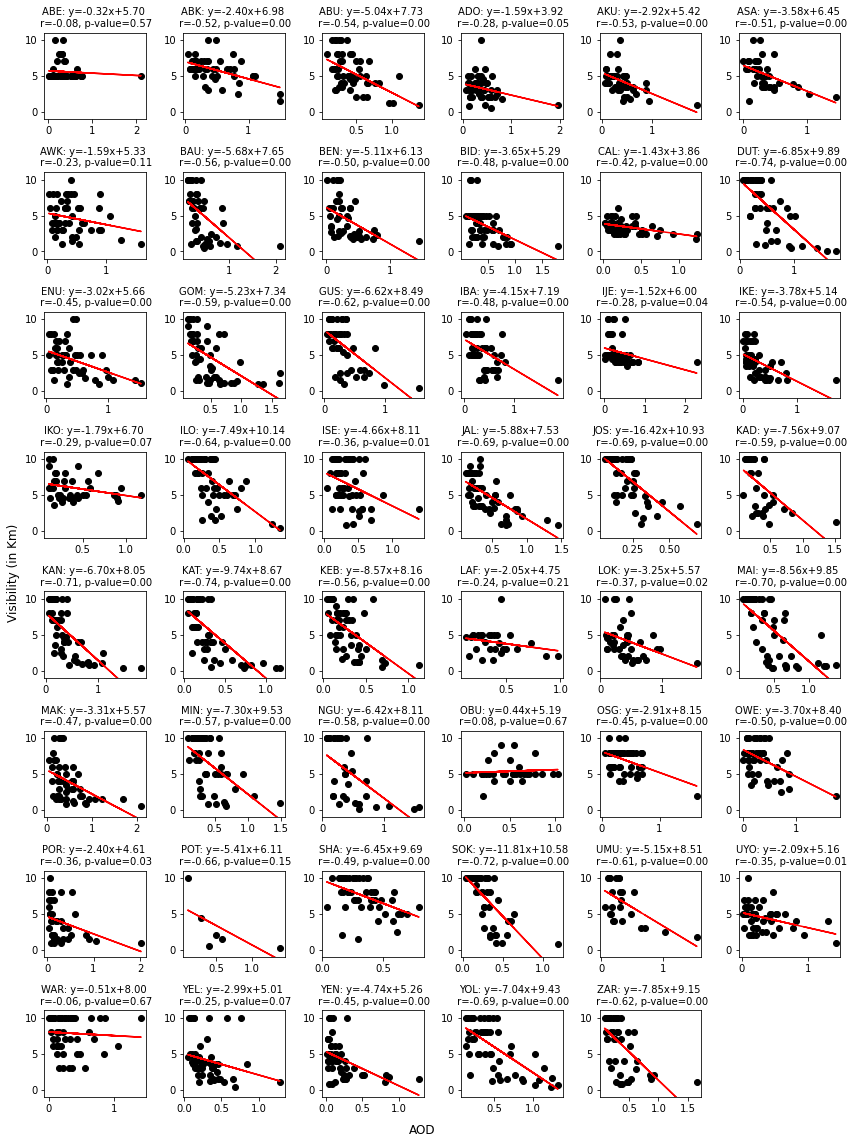

In [13]:
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')

cor_ls = []

fig = plt.figure(figsize=(12,16))
# fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, j in enumerate(stn):
    merged = pd.concat([vis[[j]], day1_lead_all_t[[j]]], axis=1)
    merged.columns = ["Visibility", "AOD"]
    a=merged.dropna()
#     regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(list(a['AOD']),list(a['Visibility']))
    line = (slope*a['AOD'])+intercept
    
    # append correlation
    cor_ls.append([stn_lat[i], stn_lon[i], j, round(r_value, 2), round(p_value, 2)])
    
    ax = fig.add_subplot(8,6,i+1, )
    ax.scatter(merged['AOD'], merged['Visibility'], color = 'k')
    ax.plot(list(a['AOD']), line, 'r')
    title = j+': y={:.2f}x+{:.2f} \n '.format(slope,intercept)  + 'r={:.2f}, '.format(r_value) + 'p-value={:.2f}'.format(p_value)

    ax.set_title(title, fontsize = 10)
#     ax.set_xlim([0, 1.5])
    ax.set_ylim([-1, 11])
    
#     ax.set_ylabel('Visibility (in Km)')
#     ax.set_xlabel('bbb')
# fig.suptitle('a')
fig.supxlabel('AOD')
fig.supylabel('Visibility (in Km)')
fig.tight_layout(rect=(0.0,0,1,1))
    
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel("common X")
# plt.ylabel("common Y")    
#     plt.subplot(7,7,i+1)
#     plt.scatter(merged['AOD'], merged['Visibility'], color = 'k', ls='solid')
#     plt.title(j)
# plt.xlabel('AOD')
# plt.ylabel('Visibility (in Km)')
#     plt.text(j)
#     for j in stn:
        
#         plt.subplot(2, 3, i)
#         plt.scatter(merged['AOD'], merged['Visibility'])
# # #         plt.text(0.5, 0.5, str((2, 3, i)),
# # #                  fontsize=18, ha='center')
            


# # fig = plt.figure(figsize=(3,3))
# fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(15,15))
# plt.subplots_adjust(hspace=0.2)
# for j, ax in zip(stn, axs.ravel()):
#     print(j, ax)
#     merged = pd.concat([vis[[j]], day1_lead_all_t[[j]]], axis=1)
#     merged.columns = ["Visibility", "AOD"]
# #     merged['AOD'].scatter(merged['Visibility'],ax=ax)
#     plt.scatter(merged['AOD'], merged['Visibility'],ax=ax)
# #     plt.figure()
# #     plt.scatter(merged['AOD'], merged['Visibility'],color='k', ls='solid')
# #     plt.show()
    
    

In [14]:
cor_df = pd.DataFrame(cor_ls, columns=["Lat", "Long", "Station", "r_value", "p_value"])
cor_df['p'] = 2
cor_df.loc[cor_df['p_value'] > 0.05, 'p'] = 1
cor_df

,Lat,Long,Station,r_value,p_value,p
0,7.20,3.33,ABE,-0.08,0.57,1
1,6.25,8.19,ABK,-0.52,0.00,2
2,9.00,7.20,ABU,-0.54,0.00,2
3,7.60,5.20,ADO,-0.28,0.05,2
4,7.20,5.30,AKU,-0.53,0.00,2
5,6.82,6.23,ASA,-0.51,0.00,2
6,6.20,7.07,AWK,-0.23,0.11,1
7,10.28,9.82,BAU,-0.56,0.00,2
8,6.33,5.60,BEN,-0.50,0.00,2
9,9.80,6.00,BID,-0.48,0.00,2


In [15]:
# cor_df.to_csv("cor_files/day1/SILAM_1d.csv", index=False)
cor_df.to_csv("cor_files/day2/SILAM_2d.csv", index=False)
# cor_df.to_csv("cor_files/day3/SILAM_3d.csv", index=False)

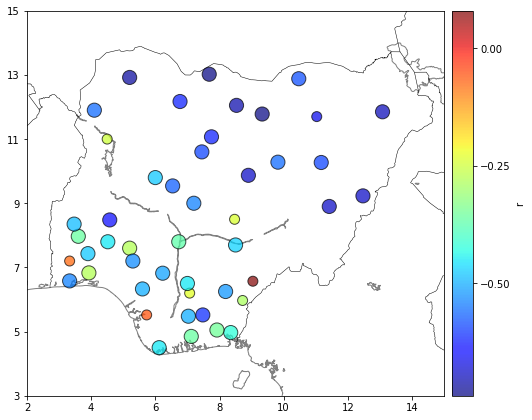

In [16]:
# plot coastlines with Basemap
plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution='h',
llcrnrlat=3, urcrnrlat=15,
llcrnrlon=2, urcrnrlon=15)
# m.drawmapboundary(fill_color='#DDEEFF')
# m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='grey', zorder=2)
m.drawcountries(color='black', zorder=2)
# m.shadedrelief()
m.drawstates()

# m.readshapefile('./nigeria_states/nigeria_states', 'nigeria_states')

# plot locations
m.scatter(cor_df["Long"], cor_df["Lat"], latlon=True, 
          c=cor_df["r_value"], s=cor_df["p"]*100,
          edgecolors="black", zorder=3,
          cmap='jet', alpha=0.7)

# create colorbar and legend
m.colorbar(label=r'r', ticks=np.linspace(1, -1, 9), shrink=0.755)
# plt.set_ticks(np.linspace(1, -1, 9))
plt.xticks(range(2, 16, 2))
plt.yticks(range(3, 16, 2))
plt.show()